In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from scipy import misc, ndimage
from skimage import measure
from ipywidgets import interact
#from skimage import restoration

In [2]:
%matplotlib notebook 

<IPython.core.display.Javascript object>


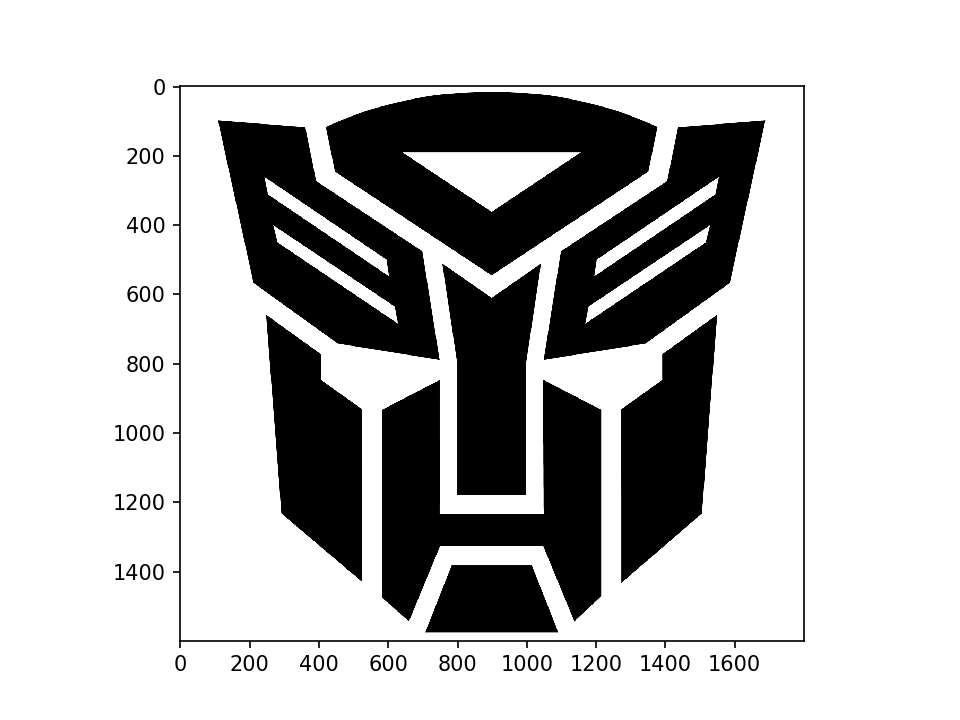

In [3]:
autobots = plt.imread("Transformers-Logo.png")
autobots = np.average(autobots[:,:,:3], axis=2)
plt.imshow(autobots, cmap='gray')

<IPython.core.display.Javascript object>


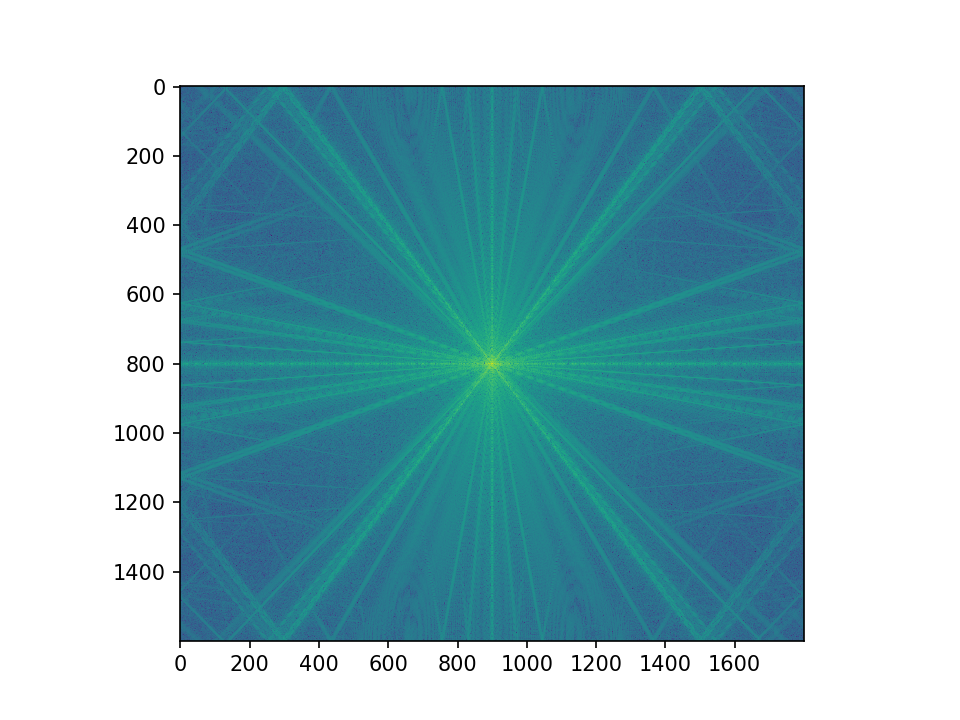

In [5]:
FourierTransformers = np.fft.fft2(autobots)
plt.figure()
plt.imshow(np.log10(np.fft.fftshift(np.abs(FourierTransformers))))

<IPython.core.display.Javascript object>


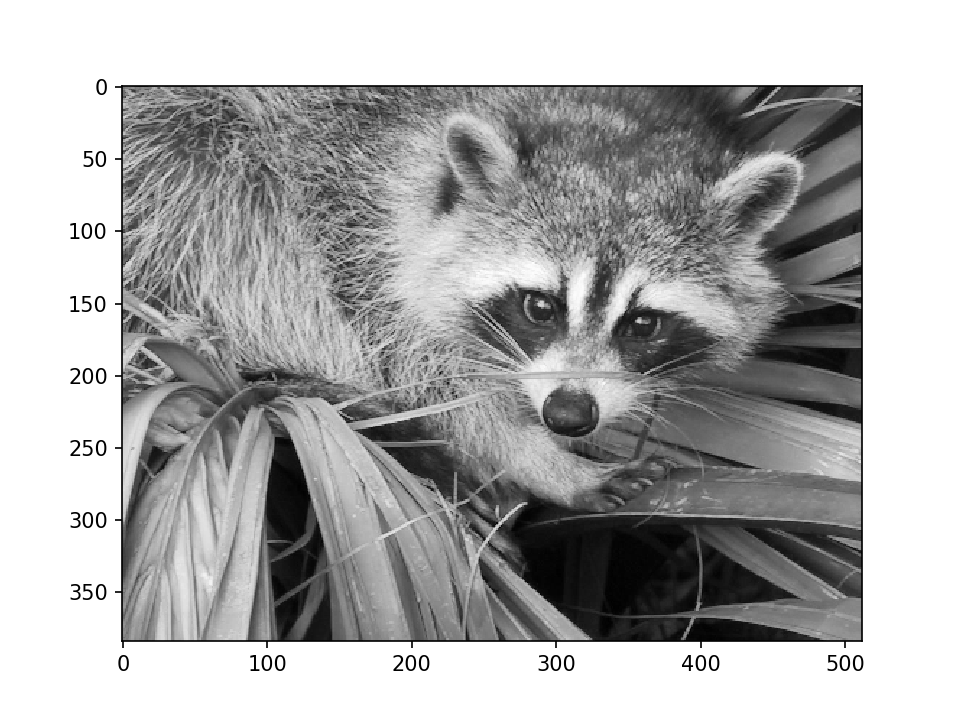

In [4]:
face = misc.face(True)
face= measure.block_reduce(face, (2,2), np.max)
plt.figure()
plt.imshow(face, cmap='gray')

<IPython.core.display.Javascript object>


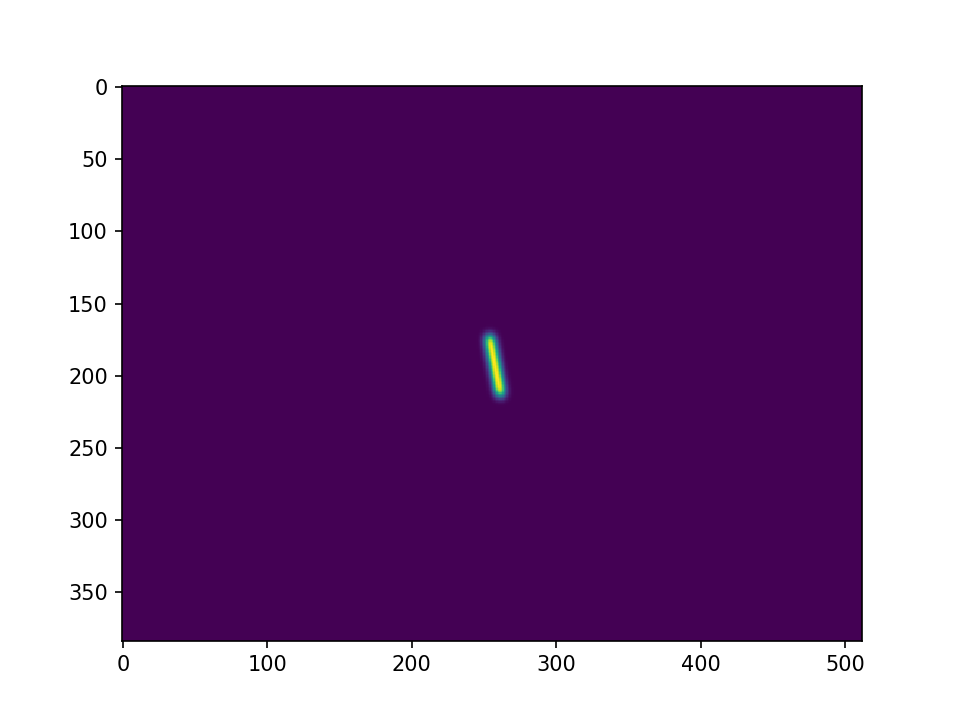

In [9]:
XX, YY = np.meshgrid(np.arange(64) - 32, np.arange(64) - 32)
sigma = 3
gaussian = 1 / (2 * np.pi * sigma**2) * np.exp(-(XX**2 + YY**2) / (2 * sigma**2))
movement = gaussian * 0
movement[np.abs(YY - 5*XX + 3) < 3] += 1
movement[np.abs(YY) > 20] = 0
psf = convolve2d(gaussian, movement, mode="same")
psf = psf / np.sum(psf)
numpad0 = int((face.shape[0] - 64) / 2)
numpad1 = int((face.shape[1] - 64) / 2)
psf = np.pad(psf, ((numpad0,), (numpad1,)))
plt.figure()
plt.imshow(psf)

<IPython.core.display.Javascript object>


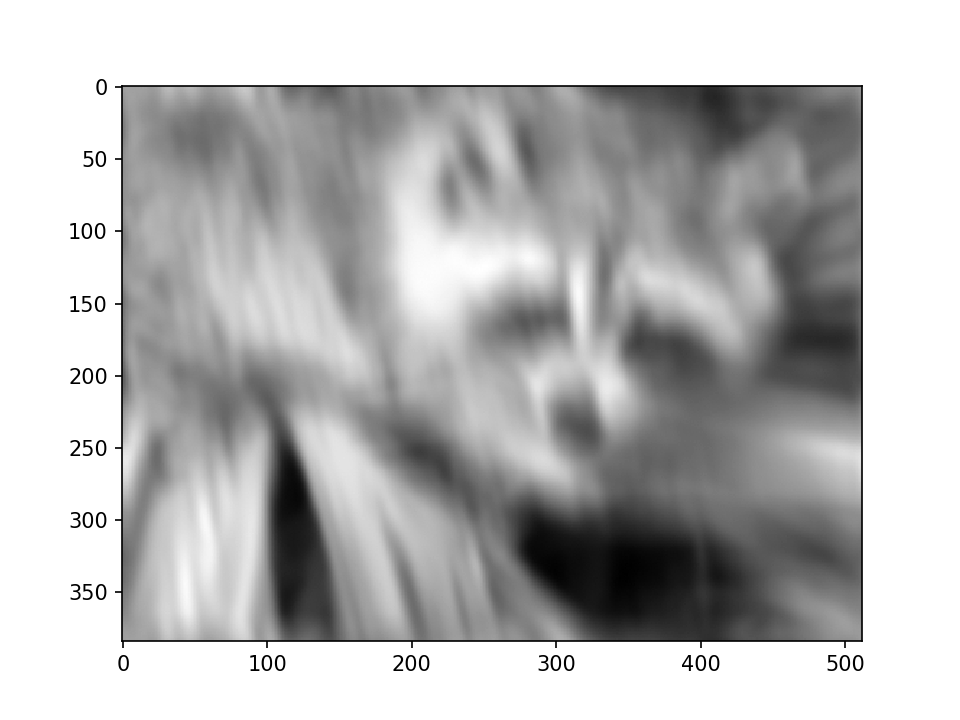

In [33]:
X = np.fft.fft2(face)
H = np.fft.fft2(psf)
blur = 1 / (X.shape[0] * X.shape[1]) * np.fft.fftshift(np.fft.ifft2(X * H).real)
noise = np.random.randn(blur.shape[0], blur.shape[1]) * 0.01 * np.std(blur)
blur += noise
plt.figure()
plt.imshow(blur, cmap='gray')

<IPython.core.display.Javascript object>


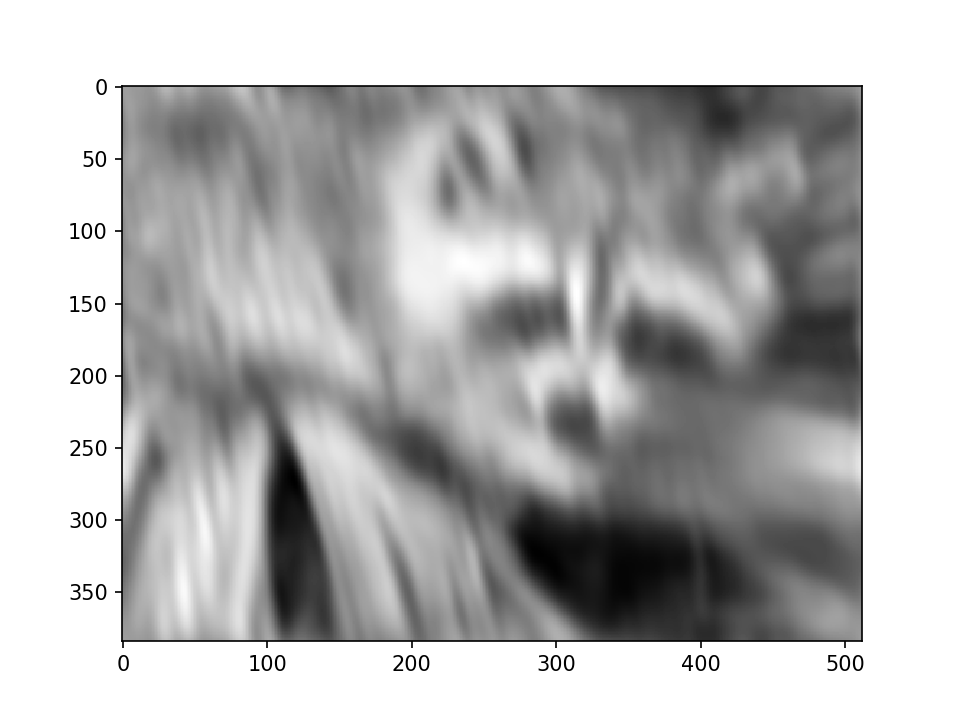

interactive(children=(FloatSlider(value=-1.0, description='logalpha', max=0.0, min=-4.0), Output()), _dom_clas…

<function __main__.deconvolve(logalpha=-1)>

In [34]:
Y = np.fft.fft2(blur)
plt.figure()

def deconvolve(logalpha=-1):
    alpha = 10**logalpha
    G = np.conj(H) / (np.abs(H)**2 + alpha**2)
    deconvolved = X.shape[1] * X.shape[0] * np.fft.fftshift(np.fft.ifft2(G * Y).real)
    plt.imshow(deconvolved, cmap='gray')
    
interact(deconvolve, logalpha=(-4.0, 0))
